In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

In [468]:
# load the provided data
train_features = pd.read_csv('data/dengue_features_train.csv',
                             index_col=[0])

train_labels = pd.read_csv('data/dengue_labels_train.csv',
                           index_col=[0])

In [3]:
train_features.head()

,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
city,,,,,,,,,,,,,,,,,,,,,
sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [469]:
# Seperate data for San Juan
sj_train_features = train_features.loc['sj']
sj_train_labels = train_labels.loc['sj']

# Separate data for Iquitos
iq_train_features = train_features.loc['iq']
iq_train_labels = train_labels.loc['iq']

In [99]:
sj_train_labels.describe()

,year,weekofyear,total_cases
count,936.000000,936.000000,936.000000
mean,1998.826923,26.503205,34.180556
std,5.212076,15.021909,51.381372
min,1990.000000,1.000000,0.000000
25%,1994.000000,13.750000,9.000000
50%,1999.000000,26.500000,19.000000
75%,2003.000000,39.250000,37.000000
max,2008.000000,53.000000,461.000000


In [100]:
iq_train_labels.describe()

,year,weekofyear,total_cases
count,520.000000,520.000000,520.000000
mean,2005.000000,26.503846,7.565385
std,2.918283,15.029450,10.765478
min,2000.000000,1.000000,0.000000
25%,2002.750000,13.750000,1.000000
50%,2005.000000,26.500000,5.000000
75%,2007.250000,39.250000,9.000000
max,2010.000000,53.000000,116.000000


In [470]:
sj_train_features['week_start_date'] = pd.to_datetime(sj_train_features['week_start_date'])
iq_train_features['week_start_date'] = pd.to_datetime(iq_train_features['week_start_date'])

<ipython-input-470-6c209760c224>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sj_train_features['week_start_date'] = pd.to_datetime(sj_train_features['week_start_date'])
<ipython-input-470-6c209760c224>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iq_train_features['week_start_date'] = pd.to_datetime(iq_train_features['week_start_date'])


In [471]:
sj_train_features['total_cases'] = sj_train_labels.total_cases
iq_train_features['total_cases'] = iq_train_labels.total_cases

<ipython-input-471-82dbe2804b03>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sj_train_features['total_cases'] = sj_train_labels.total_cases
<ipython-input-471-82dbe2804b03>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iq_train_features['total_cases'] = iq_train_labels.total_cases


In [472]:
sj_train_features.set_index(sj_train_features['week_start_date'], drop=True, inplace=True)
iq_train_features.set_index(iq_train_features['week_start_date'], drop=True, inplace=True)

In [473]:
sj_train_features.fillna(method='ffill', inplace=True)
iq_train_features.fillna(method='ffill', inplace=True)

C:\Users\raart\anaconda\envs\dengueprediction\lib\site-packages\pandas\core\frame.py:4147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


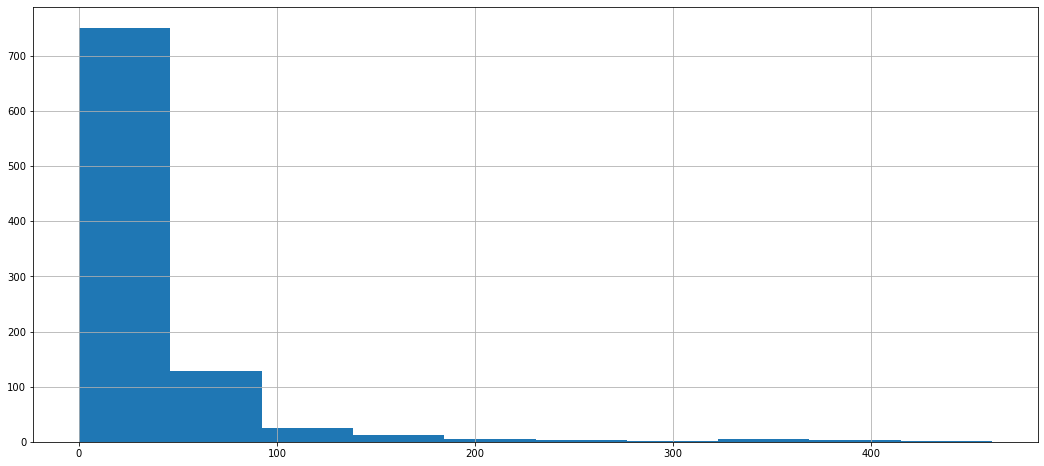

In [105]:
sj_train_features.total_cases.hist()

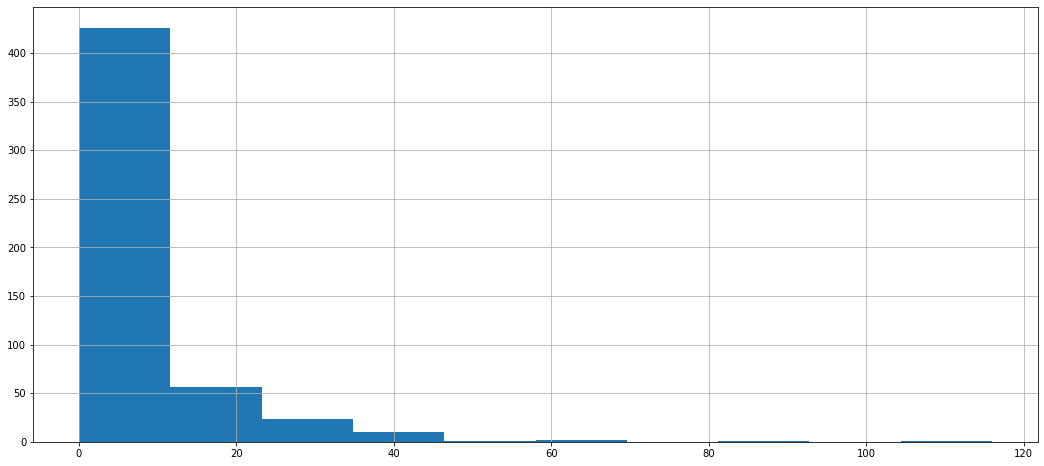

In [106]:
iq_train_labels.total_cases.hist()

### Feature Selection ###

In [474]:
# compute the correlations
sj_correlations = sj_train_features.corr()
iq_correlations = iq_train_features.corr()

Text(0.5, 1.0, 'San Juan Variable Correlations')

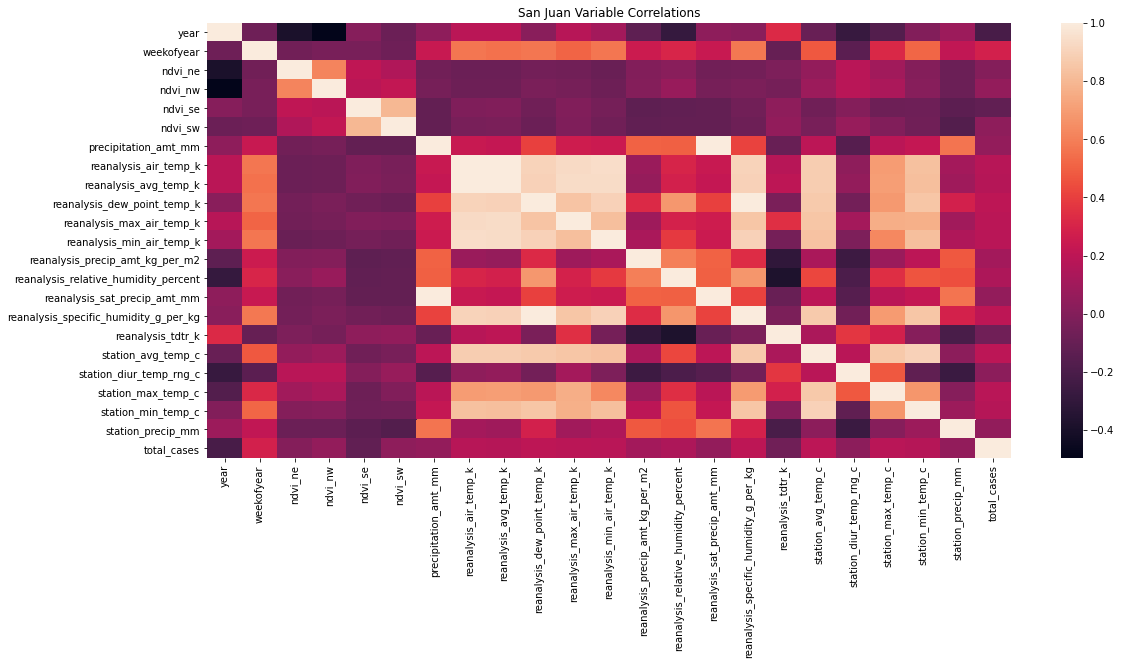

In [475]:
# plot san juan
sj_corr_heat = sns.heatmap(sj_correlations)
plt.title('San Juan Variable Correlations')

Text(0.5, 1.0, 'Iquitas Variable Correlations')

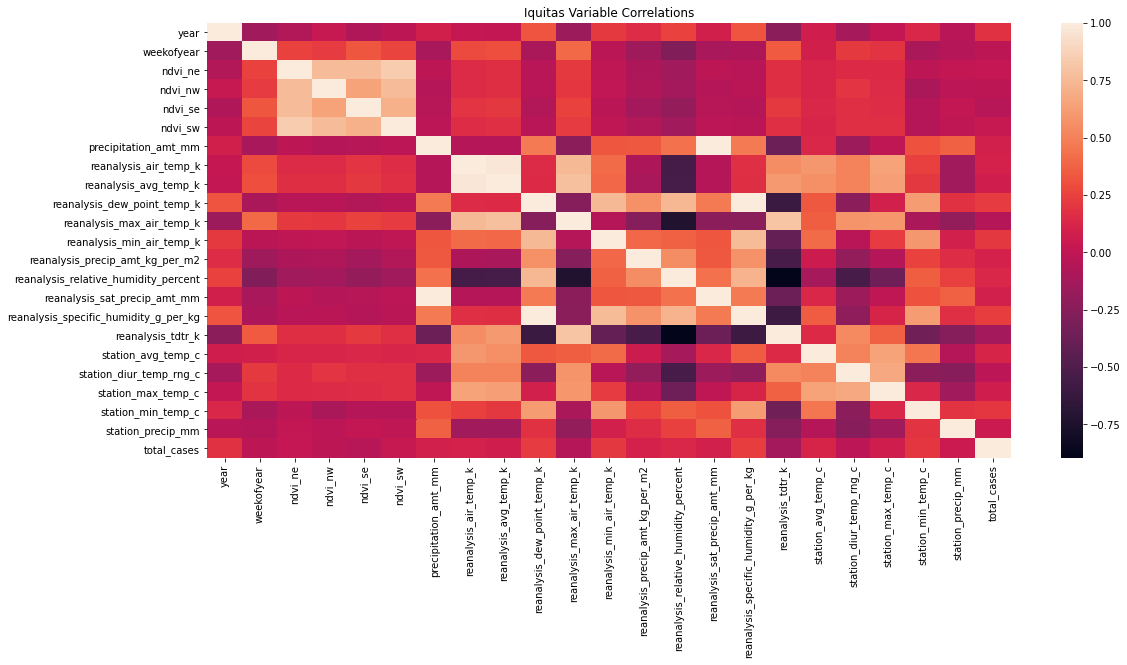

In [476]:
# plot iq
iq_corr_heat = sns.heatmap(iq_correlations)
plt.title('Iquitas Variable Correlations')

In [478]:
# remove features with high correlation
columns = np.full((sj_correlations.shape[0],), False, dtype=bool)
for i in range(sj_correlations.shape[0]):
    for j in range(i+1, sj_correlations.shape[0]):
        if sj_correlations.iloc[i,j] >= 0.9:
            if not columns[j]:
                columns[j] = True
dropped_features = sj_train_features.drop(['week_start_date'], axis=1).columns[columns]
dropped_features

Index(['reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg'],
      dtype='object')

In [479]:
# remove features with high correlation
columns = np.full((iq_correlations.shape[0],), False, dtype=bool)
for i in range(iq_correlations.shape[0]):
    for j in range(i+1, iq_correlations.shape[0]):
        if iq_correlations.iloc[i,j] >= 0.9:
            if not columns[j]:
                columns[j] = True
dropped_features_iq = iq_train_features.drop(['week_start_date'], axis=1).columns[columns]
dropped_features_iq

Index(['reanalysis_avg_temp_k', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg'],
      dtype='object')

In [490]:
# features with high correlation to target variable
features_corr_sj = sj_correlations.total_cases.drop('total_cases').drop(dropped_features).sort_values(ascending=False)
features_corr_sj

weekofyear                              0.287134
station_avg_temp_c                      0.194126
station_max_temp_c                      0.187544
reanalysis_air_temp_k                   0.179402
station_min_temp_c                      0.174285
reanalysis_relative_humidity_percent    0.142317
reanalysis_precip_amt_kg_per_m2         0.106591
ndvi_nw                                 0.059208
precipitation_amt_mm                    0.056942
station_precip_mm                       0.050835
ndvi_sw                                 0.041055
station_diur_temp_rng_c                 0.034801
ndvi_ne                                 0.004144
reanalysis_tdtr_k                      -0.067920
ndvi_se                                -0.120024
year                                   -0.212690
Name: total_cases, dtype: float64

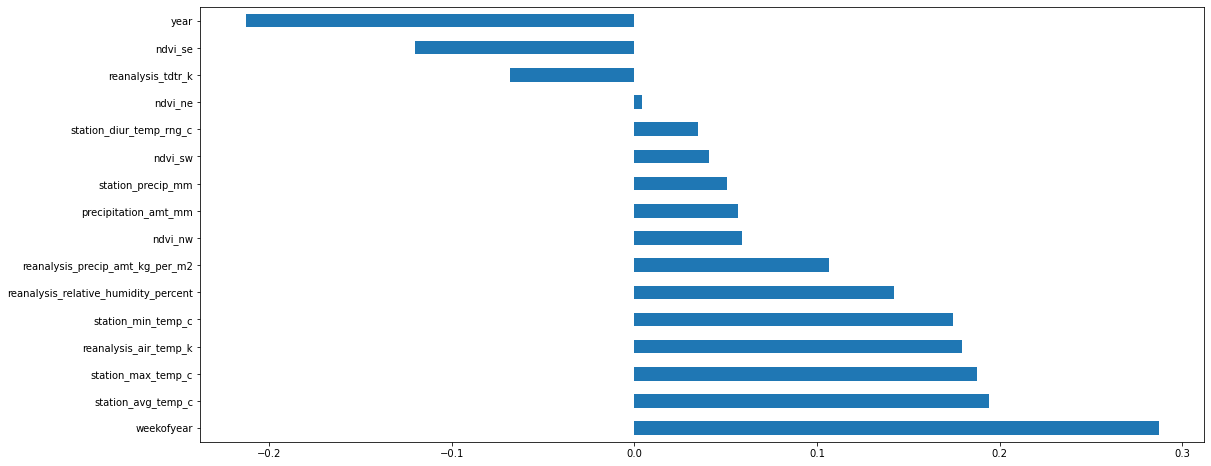

In [484]:
features_corr_sj.plot.barh()

In [489]:
features_corr_iq = iq_correlations.total_cases.drop('total_cases').drop(dropped_features_iq).sort_values(ascending=False)
features_corr_iq

reanalysis_dew_point_temp_k             0.228864
reanalysis_min_air_temp_k               0.210854
station_min_temp_c                      0.202844
year                                    0.179451
reanalysis_relative_humidity_percent    0.128548
station_avg_temp_c                      0.114431
reanalysis_precip_amt_kg_per_m2         0.100686
reanalysis_air_temp_k                   0.096666
precipitation_amt_mm                    0.089410
station_max_temp_c                      0.079937
station_precip_mm                       0.045283
ndvi_sw                                 0.031369
ndvi_ne                                 0.019740
ndvi_nw                                -0.010520
weekofyear                             -0.011850
station_diur_temp_rng_c                -0.021254
ndvi_se                                -0.041153
reanalysis_max_air_temp_k              -0.053157
reanalysis_tdtr_k                      -0.130535
Name: total_cases, dtype: float64

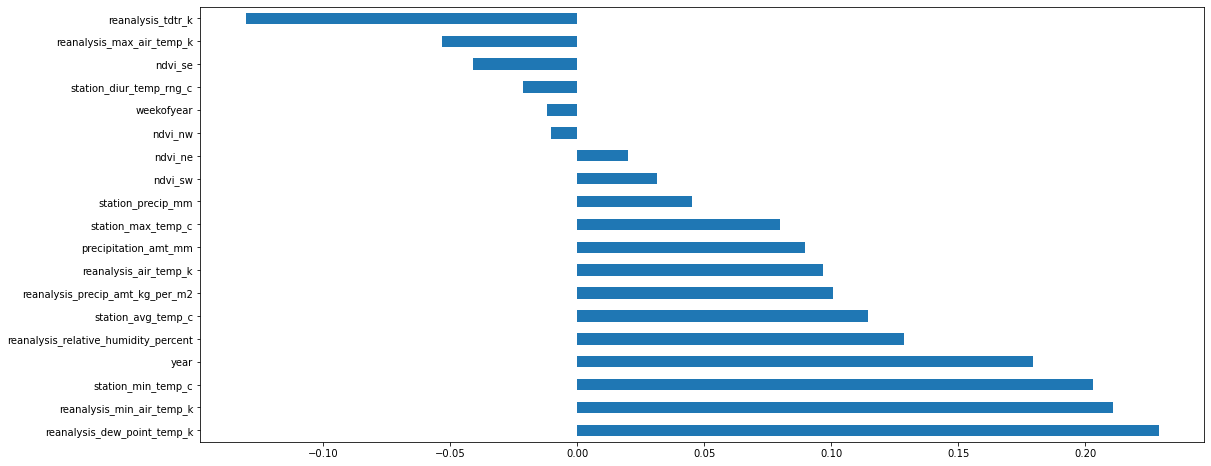

In [487]:
features_corr_iq.plot.barh()

In [13]:
sj_train_features.groupby(by=["year"]).total_cases.idxmax()

year
1990   1990-11-05
1991   1991-11-26
1992   1992-01-08
1993   1993-11-12
1994   1994-10-15
1995   1995-01-01
1996   1996-10-21
1997   1997-10-29
1998   1998-08-06
1999   1999-01-15
2000   2000-11-18
2001   2001-11-05
2002   2002-01-08
2003   2003-10-01
2004   2004-09-23
2005   2005-09-03
2006   2006-09-24
2007   2007-10-01
2008   2008-01-01
Name: total_cases, dtype: datetime64[ns]

In [14]:
iq_train_features.groupby(by=["year"]).total_cases.idxmax()

year
2000   2000-09-09
2001   2001-12-17
2002   2002-12-03
2003   2003-01-01
2004   2004-12-09
2005   2005-04-09
2006   2006-02-05
2007   2007-12-10
2008   2008-10-14
2009   2009-01-29
2010   2010-02-19
Name: total_cases, dtype: datetime64[ns]

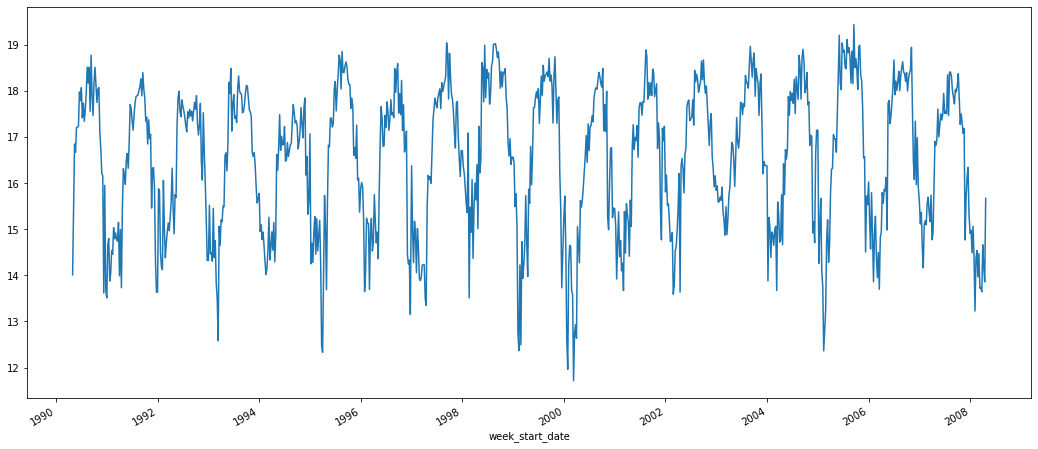

In [113]:
sj_train_features['reanalysis_specific_humidity_g_per_kg'].plot()

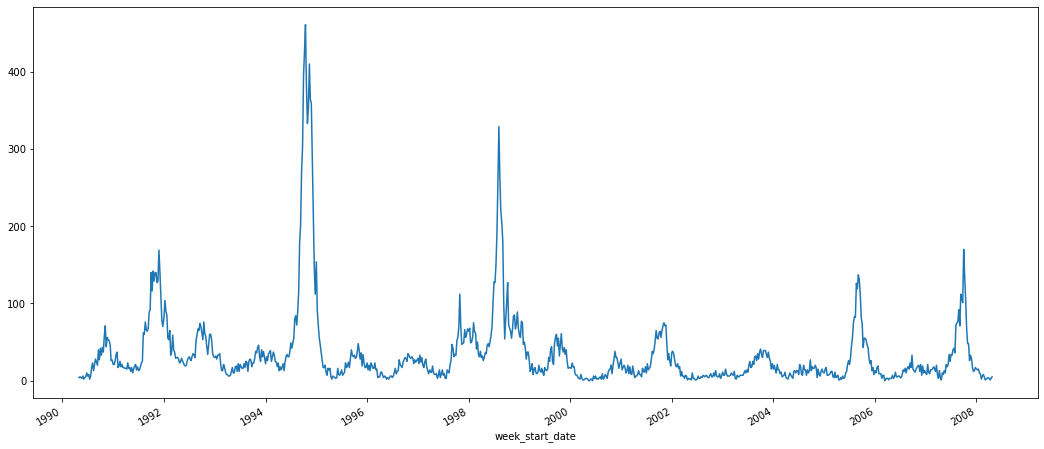

In [114]:
sj_train_features['total_cases'].plot()

In [497]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

features = sj_train.columns.drop(dropped_features).values
features = features[(features != 'total_cases') & (features != 'year') & (features != 'week_start_date')]
# features with highest chi-squared statistics are selected
chi2_features = SelectKBest(chi2, k = 10)
X_kbest_features = chi2_features.fit_transform(sj_train[features], sj_train['total_cases'])
features_chi2_sj = features[chi2_features.scores_.argsort()[0:10]]
features_chi2_sj

array(['reanalysis_tdtr_k', 'ndvi_sw', 'ndvi_nw', 'ndvi_ne',
       'reanalysis_relative_humidity_percent', 'station_diur_temp_rng_c',
       'ndvi_se', 'station_precip_mm', 'station_min_temp_c',
       'reanalysis_precip_amt_kg_per_m2'], dtype=object)

In [499]:
features_chi2_sj 

array([2.14526702e+00, 2.61683745e+00, 3.00172865e+00, 3.62296147e+00,
       4.04002130e+00, 4.06624988e+00, 4.46447054e+00, 7.53984897e+00,
       9.91758550e+00, 1.22675603e+01, 1.32313007e+01, 1.36016287e+01,
       1.51600040e+01, 1.58958690e+01, 4.46679210e+03])

In [493]:
features = iq_train.columns.drop(dropped_features_iq).values
features = features[(features != 'total_cases') & (features != 'year') & (features != 'week_start_date')]

X_kbest_features = chi2_features.fit_transform(iq_train[features], iq_train['total_cases'])
features_iq = features[chi2_features.scores_.argsort()[0:10]]
features_iq

array(['station_avg_temp_c', 'ndvi_ne', 'station_max_temp_c', 'ndvi_nw',
       'station_min_temp_c', 'reanalysis_max_air_temp_k',
       'reanalysis_min_air_temp_k', 'reanalysis_tdtr_k',
       'station_diur_temp_rng_c', 'ndvi_se'], dtype=object)

### Time series ###

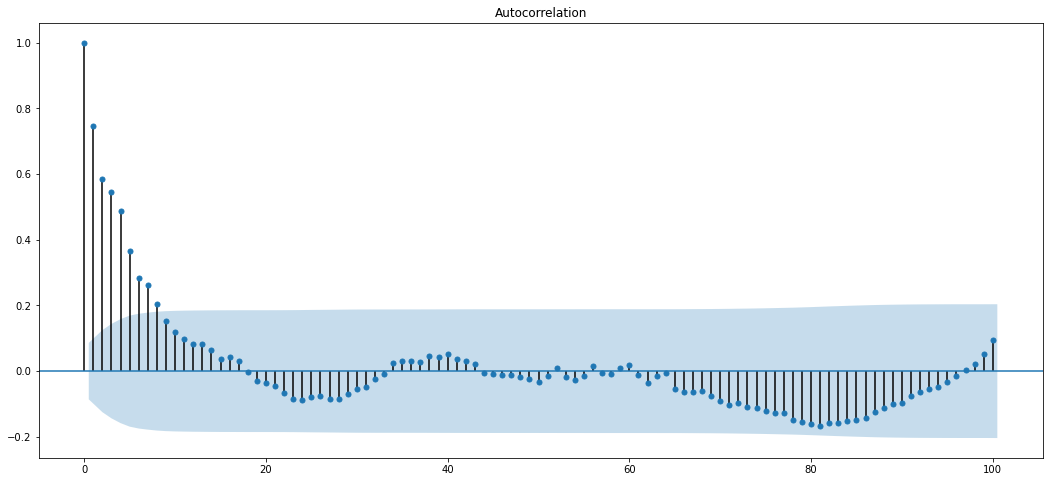

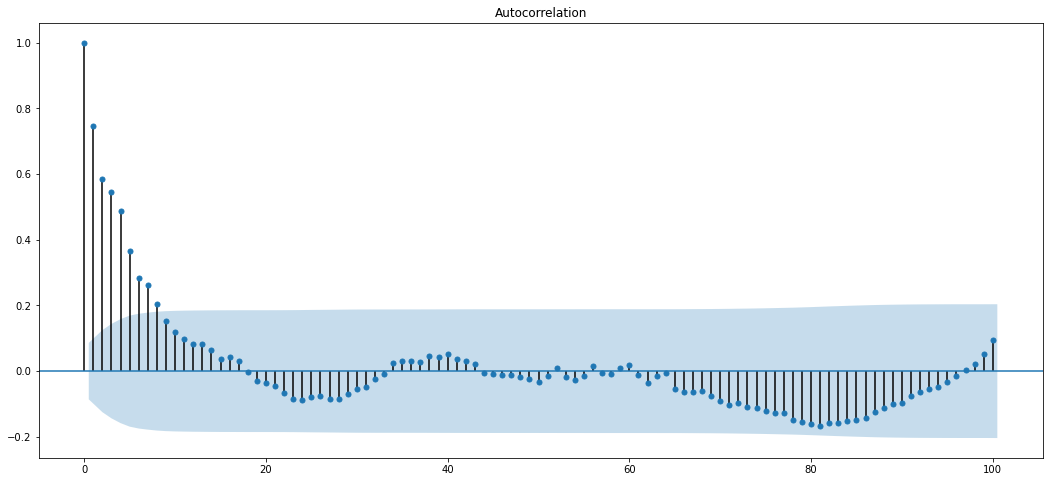

In [44]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(iq_train_features.total_cases, lags=100)

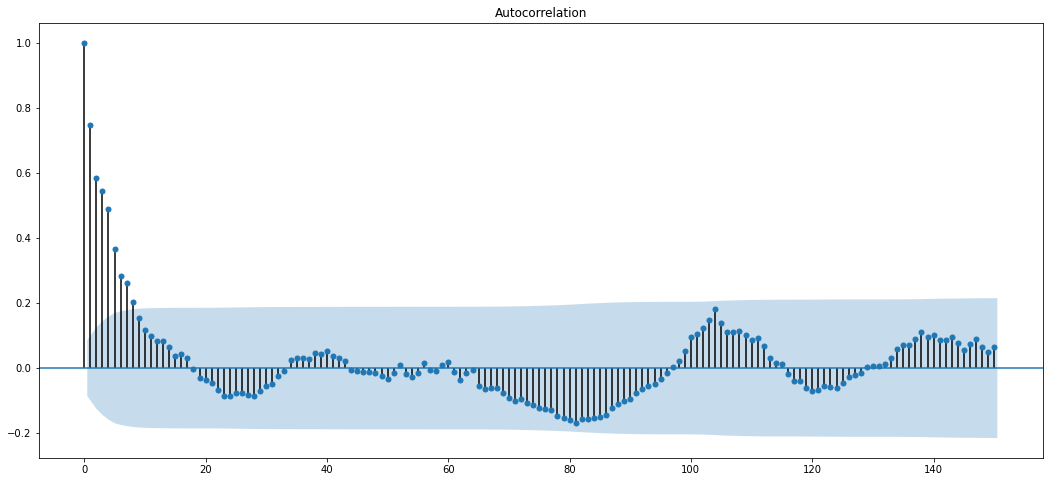

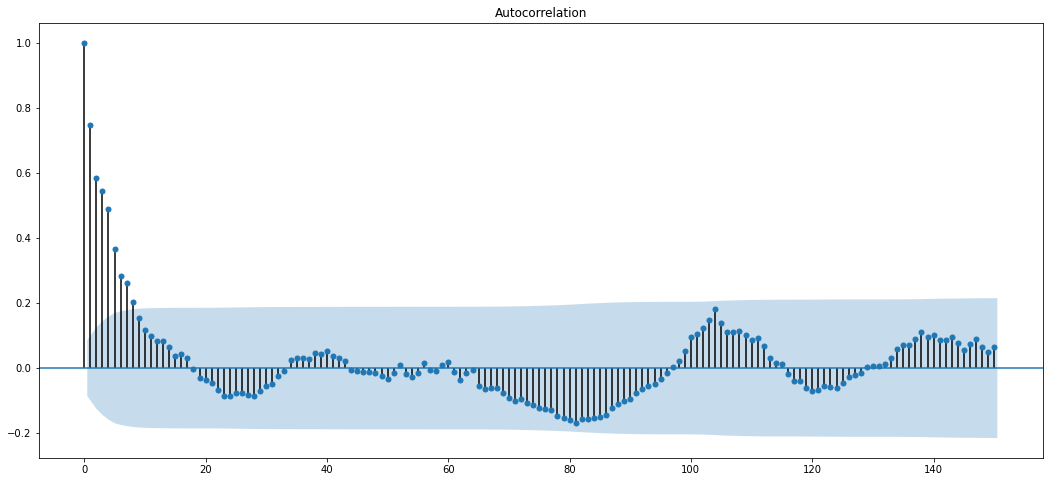

In [45]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(iq_train_features.total_cases, lags=150)

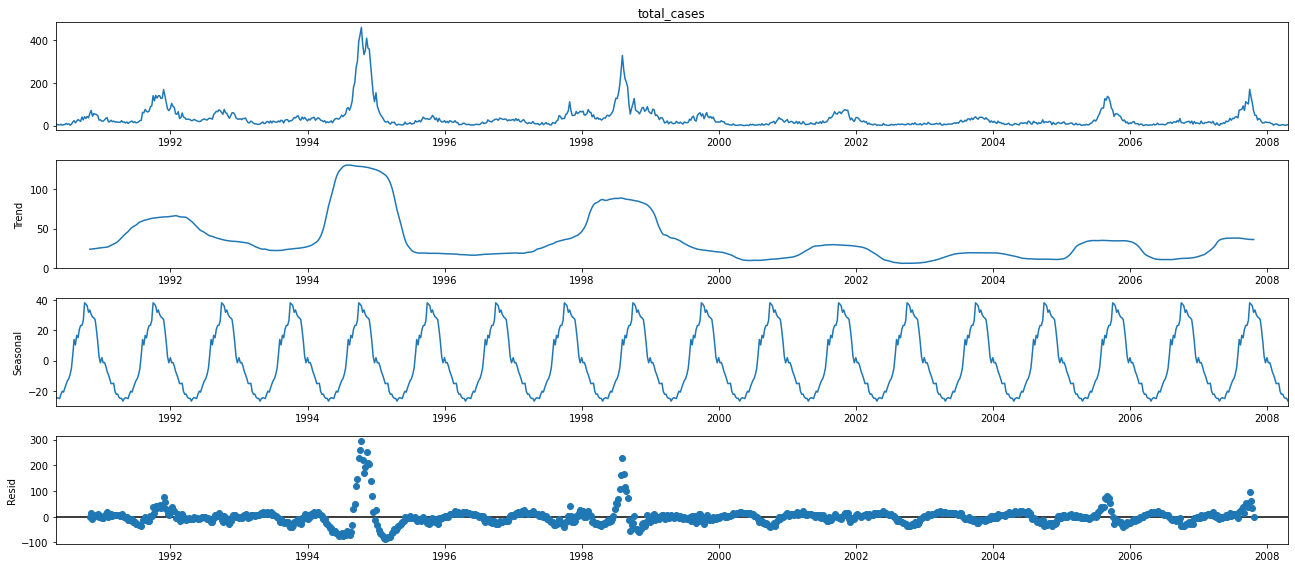

In [46]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(sj_train_features.total_cases, model='additive', period=52)
fig = decomposition.plot()
plt.show()

C:\Users\raart\anaconda\envs\dengueprediction\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


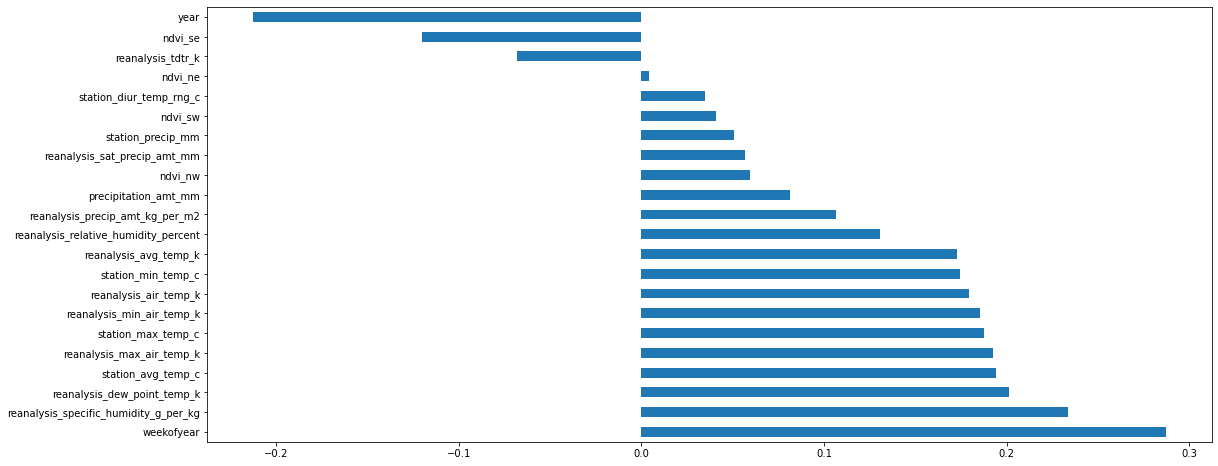

In [47]:
# check if there is a time lag between precipitation and total cases
features = ['reanalysis_specific_humidity_g_per_kg', 
                 'precipitation_amt_mm',
                 'reanalysis_relative_humidity_percent' ]
shifted = sj_train_features
shifted[features] = sj_train_features[features].shift(periods=2, fill_value=0)
sj_train_features.drop(['year', 'weekofyear','week_start_date'], axis=1)
sj_correlations = shifted.corr()
(sj_correlations
     .total_cases
     .drop('total_cases') # don't compare with myself
     .sort_values(ascending=False)
     .plot
     .barh())

In [48]:
import pmdarima as pm
adf_test=pm.arima.ADFTest(alpha=0.05)
print(adf_test.should_diff(sj_train_features.total_cases))
print(adf_test.should_diff(iq_train_features.total_cases))

(0.01, False)
(0.01, False)


### Data Preparation ###

In [ ]:
# optimize lag to increase correlation #

In [137]:
def find_lag(data, features):
    shifted = data.copy()
    corr_matrix = np.zeros((14, len(features)))
    for i in range(0, 14):
        shifted = data.copy()
        shifted[features] = data[features].shift(periods=i, fill_value=0)
        corr_matrix[i,:] = shifted.corr().total_cases.drop('total_cases')
    lags = np.argmax(np.abs(corr_matrix), axis=0)
    print(lags)
    return lags

In [400]:
def set_lags(data, lags, features):
    for i in range(len(features)):
        data[features[i]] = data[features[i]].shift(periods=lags[i], fill_value=0) 
    return data

In [393]:
from sklearn.preprocessing import MinMaxScaler
def preprocess_data(data_path, labels_path=None, features=None):
    # load data and set index to city, year, weekofyear
    df = pd.read_csv(data_path, index_col=[0, 1, 2])
   
    if not features:
        features = df.columns.values[(df.columns.values != 'year') & (df.columns.values != 'week_start_date')]
    # scale features
    scaler = MinMaxScaler(feature_range=(0, 1))
    df[features] = scaler.fit_transform(df[features])
    
    # add labels to dataframe
    if labels_path:
        labels = pd.read_csv(labels_path, index_col=[0, 1, 2])
        df = df.join(labels)
    # fill missing values
    df.fillna(method='ffill', inplace=True)
        
    # separate san juan and iquitos
    sj = df.loc['sj']
    iq = df.loc['iq']
    
    # reindex with week start date
    sj['week_start_date'] = pd.to_datetime(sj['week_start_date'])
    sj.set_index(sj['week_start_date'], inplace=True)
    iq['week_start_date'] = pd.to_datetime(iq['week_start_date'])
    iq.set_index(iq['week_start_date'], inplace=True)
    
    # feature selection
    
    return sj, iq

In [394]:
features = sj_train.columns.values[(sj_train.columns.values != 'total_cases') & (sj_train.columns.values != 'year') & (sj_train.columns.values != 'week_start_date')]
features

array(['ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm',
       'reanalysis_air_temp_k', 'reanalysis_avg_temp_k',
       'reanalysis_dew_point_temp_k', 'reanalysis_max_air_temp_k',
       'reanalysis_min_air_temp_k', 'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent',
       'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c',
       'station_max_temp_c', 'station_min_temp_c', 'station_precip_mm'],
      dtype=object)

In [401]:
# load and preprocess data
sj_train, iq_train = preprocess_data('data/dengue_features_train.csv',
                                    labels_path="data/dengue_labels_train.csv")
sj_test, iq_test = preprocess_data('data/dengue_features_test.csv')


<ipython-input-393-627223ed5a30>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sj['week_start_date'] = pd.to_datetime(sj['week_start_date'])
<ipython-input-393-627223ed5a30>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iq['week_start_date'] = pd.to_datetime(iq['week_start_date'])
<ipython-input-393-627223ed5a30>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

In [402]:
train_samples = sj_train.shape[0]
sj_lag = find_lag(sj_train, features)
sj_data = sj_train.copy()
sj_data = sj_data.append(sj_test)
sj_data = set_lags(sj_data, sj_lag, features)
sj_train = sj_data.iloc[:train_samples,:]
sj_test = sj_data.iloc[train_samples:,:]
sj_test = sj_test.drop(['total_cases'], axis=1)

iq_lag = find_lag(iq_train, features)
iq_data = iq_train.copy()
iq_data = iq_data.append(iq_test)
iq_data = set_lags(iq_data, iq_lag, features)
iq_train = iq_data.iloc[:train_samples_iq,:]
iq_test = iq_data.iloc[train_samples_iq:,:]
iq_test = iq_test.drop(['total_cases'], axis=1)

[13 11  0  1  2  8  8  8  7  7  2  9  2  8  2 10 13 11 10  1]
[11 11 13 11  3  9 10  0 10  0  0  0  3  0 13  5 10  6  1  3]


In [409]:
sj_train_subtrain = sj_train.head(800)
sj_train_subtest = sj_train.tail(sj_train.shape[0] - 800)

iq_train_subtrain = iq_train.head(400)
iq_train_subtest = iq_train.tail(iq_train.shape[0] - 400)

In [417]:
from statsmodels.tools import eval_measures
import statsmodels.formula.api as smf

def neg_binomial_model(train, test):
    # Step 1: specify the form of the model
    model_formula = "total_cases ~ 1 + " \
                    "reanalysis_specific_humidity_g_per_kg + " \
                    "reanalysis_dew_point_temp_k + " \
                    "station_min_temp_c + " \
                    "station_avg_temp_c"
    
    grid = 10 ** np.arange(-8, -3, dtype=np.float64)
                    
    best_alpha = []
    best_score = 1000
        
    # Step 2: Find the best hyper parameter, alpha
    for alpha in grid:
        model = smf.glm(
                        data=train,
                        family=sm.families.NegativeBinomial(alpha=alpha))

        results = model.fit()
        predictions = results.predict(test).astype(int)
        score = eval_measures.meanabs(predictions, test.total_cases)

        if score < best_score:
            best_alpha = alpha
            best_score = score

    print('best alpha = ', best_alpha)
    print('best score = ', best_score)
            
    # Step 3: refit on entire dataset
    full_dataset = pd.concat([train, test])
    model = smf.glm(formula=model_formula,
                    data=full_dataset,
                    family=sm.families.NegativeBinomial(alpha=best_alpha))

    fitted_model = model.fit()
    return fitted_model

In [418]:
# predictions with negative binomial model
sj_model = neg_binomial_model(sj_train_subtrain, sj_train_subtest)
sj_predictions = sj_model.predict(sj_test).astype(int)
iq_model = neg_binomial_model(iq_train_subtrain, iq_train_subtest)
iq_predictions = iq_model.predict(iq_test).astype(int)

TypeError: from_formula() missing 1 required positional argument: 'formula'

<ipython-input-411-a897c82a6344>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sj_train['fitted'] = sj_model.fittedvalues
<ipython-input-411-a897c82a6344>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iq_train['fitted'] = iq_model.fittedvalues


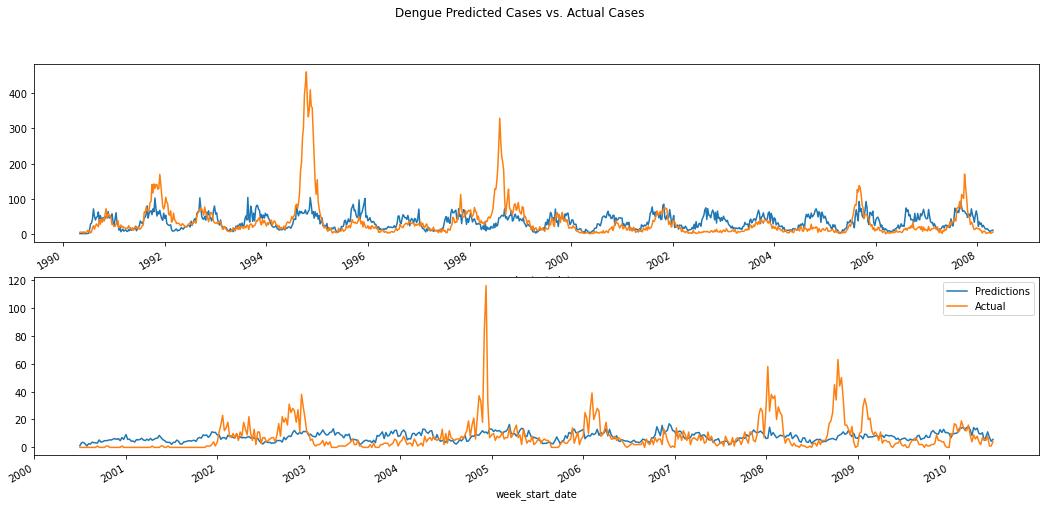

In [411]:
figs, axes = plt.subplots(nrows=2, ncols=1)
# plot sj
sj_train['fitted'] = sj_model.fittedvalues
sj_train.fitted.plot(ax=axes[0], label="Predictions")
sj_train.total_cases.plot(ax=axes[0], label="Actual")

# plot iq
iq_train['fitted'] = iq_model.fittedvalues
iq_train.fitted.plot(ax=axes[1], label="Predictions")
iq_train.total_cases.plot(ax=axes[1], label="Actual")

plt.suptitle("Dengue Predicted Cases vs. Actual Cases")
plt.legend()

In [415]:
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.ar_model import AutoRegResults
from statsmodels.tools import eval_measures
def ar_model(train, test):
    features = train.columns.values[(train.columns.values != 'total_cases') ]
    best_lag = []
    best_score = 1000
        
    # Step 2: Find the lag parameter
    for lag in range(0,52):
        results = AutoReg(train.total_cases, 
                          lags=lag, exog=train[features], 
                          seasonal=True, period=52).fit()

        predictions = results.predict(start=len(train), end=len(train)+len(test)-1, exog_oos=test[features])
        score = eval_measures.meanabs(predictions, test.total_cases)
        print(score)

        if score < best_score:
            best_lag = lag
            best_score = score

    print('best lag = ', best_lag)
    print('best score = ', best_score)
    
    results = AutoReg(train.total_cases, 
                          lags=best_lag, exog=train[features], 
                          seasonal=True, period=52).fit()

            
    # Step 3: refit on entire dataset
    full_dataset = pd.concat([train, test])
    results = AutoReg(full_dataset.total_cases, 
                          lags=best_lag, exog=full_dataset[features], 
                          seasonal=True, period=52).fit()

    return results

In [416]:
# predictions with ar
sj_model = ar_model(sj_train_subtrain, sj_train_subtest)
sj_predictions = sj_model.predict(start=len(sj_train), end=len(sj_train)+len(sj_test)-1, exog_oos=sj_test[features])
iq_model = ar_model(iq_train_subtrain, iq_train_subtest)
iq_predictions = iq_model.predict(start=len(iq_train), end=len(iq_train)+len(iq_test)-1, exog_oos=iq_test[features])

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

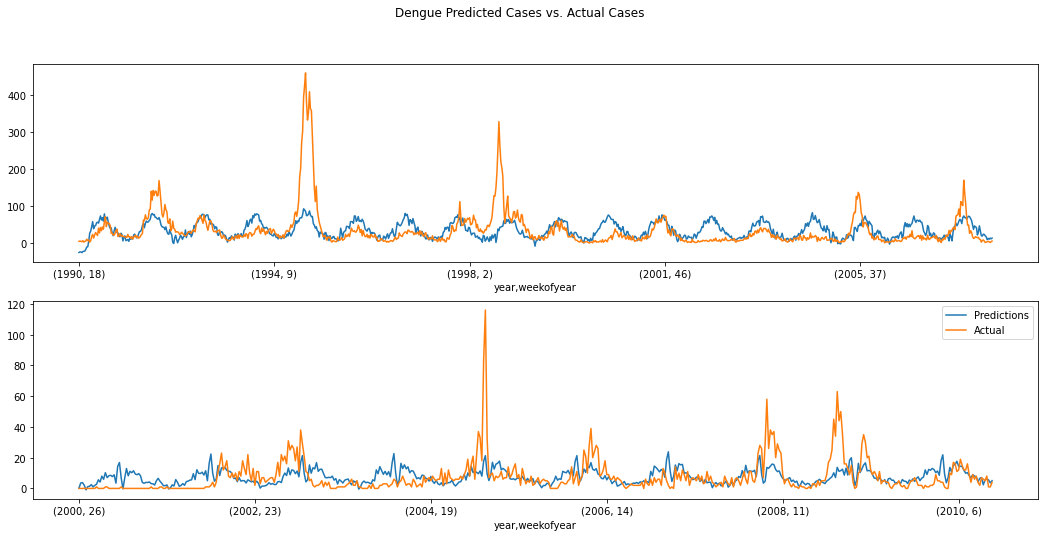

In [114]:
figs, axes = plt.subplots(nrows=2, ncols=1)
# plot sj
sj_train['fitted'] = sj_model.predict()
sj_train.fitted.plot(ax=axes[0], label="Predictions")
sj_train.total_cases.plot(ax=axes[0], label="Actual")

# plot iq
iq_train['fitted'] = iq_model.predict()
iq_train.fitted.plot(ax=axes[1], label="Predictions")
iq_train.total_cases.plot(ax=axes[1], label="Actual")

plt.suptitle("Dengue Predicted Cases vs. Actual Cases")
plt.legend()

In [94]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
def lstm_model(train, test):
    features =['reanalysis_specific_humidity_g_per_kg', 
              'reanalysis_dew_point_temp_k', 
              'station_avg_temp_c', 
              'station_min_temp_c',
              'reanalysis_precip_amt_kg_per_m2']
                    
    # create lstm inputs
    shifted = train.copy()
    shifted['prev_case_count'] = train['total_cases'].shift(periods=1, fill_value=0)

            
    # Step 3: refit on entire dataset
    full_dataset = pd.concat([train, test])
    results = AutoReg(full_dataset.total_cases, 
                          lags=best_lag, exog=full_dataset[features], 
                          seasonal=True, period=52).fit()

    return results


In [254]:
sj_train['prev_case_count'] = sj_train['total_cases'].shift(periods=1, fill_value=0)


<ipython-input-254-269561903ace>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sj_train['prev_case_count'] = sj_train['total_cases'].shift(periods=1, fill_value=0)


reanalysis_specific_humidity_g_per_kg  \
year weekofyear                                          
1991 16                                       0.379615   
     17                                       0.352009   
     18                                       0.366384   
     19                                       0.351192   
     20                                       0.346455   
     21                                       0.392519   
     22                                       0.260209   
     23                                       0.374714   
     24                                       0.230644   
     25                                       0.428291   

                 reanalysis_dew_point_temp_k  station_avg_temp_c  \
year weekofyear                                                    
1991 16                             0.452879            0.389058   
     17                             0.427413            0.398176   
     18                             0.441525            0.472644   
     19                             0.419303            0.410334   
     20                             0.410057            0.490881   
     21                             0.465207            0.481763   
     22                             0.322141            0.498480   
     23                             0.451095            0.495441   
     24                             0.286942            0.408815   
     25                             0.497972            0.414894   

                 station_min_temp_c  reanalysis_precip_amt_kg_per_m2  \
year weekofyear                                                        
1991 16                    0.541284                         0.036635   
     17                    0.385321                         0.034671   
     18                    0.486239                         0.038387   
     19                    0.486239                         0.034531   
     20                    0.541284                         0.014689   
     21                    0.541284                         0.036109   
     22                    0.587156                         0.061998   
     23                    0.688073                         0.103944   
     24                    0.541284                         0.076074   
     25                    0.587156                         0.008764   

                 total_cases  prev_case_count  
year weekofyear                                
1991 16                 23.0              0.0  
     17                 16.0             23.0  
     18                 17.0             16.0  
     19                 12.0             17.0  
     20                 17.0             12.0  
     21                 10.0             17.0  
     22                 15.0             10.0  
     23                 19.0             15.0  
     24                 21.0             19.0  
     25                 14.0             21.0

In [264]:
sj_test['prev_case_count'] = pd.Series([0]*(len(sj_test.index)), index=sj_test.index)
sj_test['prev_case_count'][0] = sj_train.iloc[-1]['total_cases']
sj_test

<ipython-input-264-b882514e2ba2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sj_test['prev_case_count'][0] = sj_train.iloc[-1]['total_cases']


ValueError: cannot convert float NaN to integer

In [270]:
sj_train.tail(40)

reanalysis_specific_humidity_g_per_kg  \
year weekofyear                                          
2008 28                                       0.585879   
     29                                       0.458628   
     30                                       0.509812   
     31                                       0.584867   
     32                                       0.633421   
     33                                       0.691483   
     34                                       0.728100   
     35                                       0.746510   
     36                                       0.660530   
     37                                       0.712927   
     38                                       0.765122   
     39                                       0.718187   
     40                                       0.851103   
     41                                       0.832895   
     42                                       0.823994   
     43                                       0.883674   
     44                                       0.928181   
     45                                       0.901275   
     46                                       0.857981   
     47                                       0.778475   
     48                                       0.834311   
     49                                       0.719401   
     50                                       0.725268   
     51                                       0.679749   
     52                                       0.605300   
2009 1                                        0.758244   
     2                                        0.675298   
     3                                        0.647380   
     4                                        0.514060   
     5                                        0.205139   
     6                                        0.309933   
     7                                        0.412503   
     8                                        0.247623   
     9                                        0.247623   
     10                                       0.247623   
     11                                       0.408456   
     12                                       0.425046   
     13                                       0.483714   
     14                                       0.364151   
     15                                       0.293142   

                 reanalysis_dew_point_temp_k  station_avg_temp_c  \
year weekofyear                                                    
2008 28                             0.643662            0.387850   
     29                             0.513823            0.313084   
     30                             0.565022            0.616822   
     31                             0.644481            0.637850   
     32                             0.692607            0.565421   
     33                             0.742371            0.628505   
     34                             0.781282            0.530374   
     35                             0.801761            0.752336   
     36                             0.717592            0.735981   
     37                             0.768175            0.703271   
     38                             0.816301            0.581776   
     39                             0.771862            0.757009   
     40                             0.892894            0.740654   
     41                             0.873643            0.789720   
     42                             0.861561            0.686916   
     43                             0.917469            0.827103   
     44                             0.943477            0.787383   
     45                             0.925660            0.768692   
     46                             0.897809            0.850467   
     47                             0.819578            0.691589   
     48                             0.869343            0.665888   
     49         

In [230]:
shifted = sj_train.copy()
shifted['prev'] = sj_train['total_cases'].shift(periods=1, fill_value=0)
shifted = shifted[10:]
shifted

reanalysis_specific_humidity_g_per_kg  \
year weekofyear                                          
1990 28                                       0.586900   
     29                                       0.566808   
     30                                       0.628226   
     31                                       0.628553   
     32                                       0.631003   
...                                                ...   
2008 13                                       0.307906   
     14                                       0.172656   
     15                                       0.303169   
     16                                       0.322770   
     17                                       0.257432   

                 reanalysis_dew_point_temp_k  station_avg_temp_c  \
year weekofyear                                                    
1990 28                             0.657583            0.430091   
     29                             0.643471            0.565350   
     30                             0.701541            0.565350   
     31                             0.704947            0.645897   
     32                             0.706569            0.802432   
...                                      ...                 ...   
2008 13                             0.376318            0.322188   
     14                             0.215085            0.332827   
     15                             0.374534            0.337386   
     16                             0.396431            0.299392   
     17                             0.324736            0.361702   

                 station_min_temp_c  reanalysis_precip_amt_kg_per_m2  \
year weekofyear                                                        
1990 28                    0.486239                         0.065749   
     29                    0.688073                         0.049781   
     30                    0.743119                         0.076635   
     31                    0.788991                         0.071691   
     32                    0.844037                         0.074549   
...                             ...                              ...   
2008 13                    0.541284                         0.016442   
     14                    0.587156                         0.001578   
     15                    0.486239                         0.013234   
     16                    0.587156                         0.006433   
     17                    0.587156                         0.061350   

                 total_cases  prev  
year weekofyear                     
1990 28                  8.0   6.0  
     29                  2.0   8.0  
     30                  6.0   2.0  
     31                 17.0   6.0  
     32                 23.0  17.0  
...                      ...   ...  
2008 13                  4.0   3.0  
     14                  3.0   4.0  
     15                  1.0   3.0  
     16                  3.0   1.0  
     17                  5.0   3.0  

[926 rows x 7 columns]

In [236]:
model = Sequential()
model.add(LSTM(50, input_shape=(inputs.shape[1], inputs.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')

In [237]:
# fit network
history = model.fit(inputs, target, epochs=50, validation_data=(inputs, target), verbose=2, shuffle=False)


Epoch 1/50
29/29 - 4s - loss: 33.6270 - val_loss: 33.0637
Epoch 2/50
29/29 - 0s - loss: 32.5275 - val_loss: 31.8396
Epoch 3/50
29/29 - 0s - loss: 31.1415 - val_loss: 30.2759
Epoch 4/50
29/29 - 0s - loss: 29.5671 - val_loss: 28.7248
Epoch 5/50
29/29 - 0s - loss: 28.1206 - val_loss: 27.4450
Epoch 6/50
29/29 - 0s - loss: 26.9769 - val_loss: 26.3782
Epoch 7/50
29/29 - 0s - loss: 25.9908 - val_loss: 25.5193
Epoch 8/50
29/29 - 0s - loss: 25.2805 - val_loss: 24.9225
Epoch 9/50
29/29 - 0s - loss: 24.7338 - val_loss: 24.4244
Epoch 10/50
29/29 - 0s - loss: 24.2591 - val_loss: 23.9906
Epoch 11/50
29/29 - 0s - loss: 23.8450 - val_loss: 23.5934
Epoch 12/50
29/29 - 0s - loss: 23.4483 - val_loss: 23.2031
Epoch 13/50
29/29 - 0s - loss: 23.0771 - val_loss: 22.8520
Epoch 14/50
29/29 - 0s - loss: 22.7433 - val_loss: 22.5334
Epoch 15/50
29/29 - 0s - loss: 22.4393 - val_loss: 22.2442
Epoch 16/50
29/29 - 0s - loss: 22.1385 - val_loss: 21.9298
Epoch 17/50
29/29 - 0s - loss: 21.8484 - val_loss: 21.6727
Epoch 

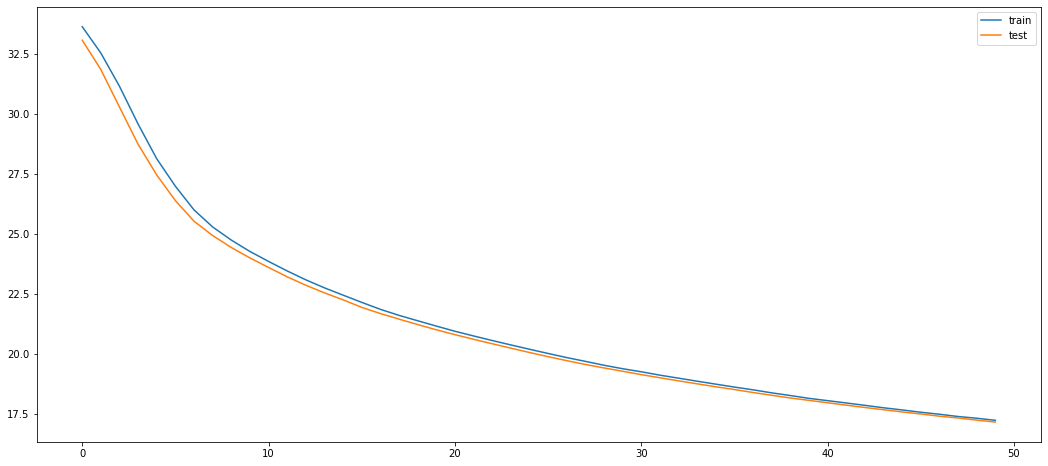

In [238]:
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [241]:
sj_predictions = model.predict(sj_test)
def forecast(train, test):
    # transform list into array
    train = asarray(train)
	# split into input and output columns
	trainX, trainy = train[:, :-1], train[:, -1]
	# fit model
	model = XGBRegressor(objective='reg:squarederror', n_estimators=1000)
	model.fit(trainX, trainy)
	# make a one-step prediction
	yhat = model.predict(asarray([testX]))
	return yhat[0]

# walk-forward validation 
def predict(train_data, test_data):
    predictions = list()
    # split dataset
    train, test = train_test_split(data, n_test)
    # seed history with training dataset
    history = [x for x in train]
    # step over each time-step in the test set
    for i in range(len(test)):
        # split test row into input and output columns
		testX, testy = test[i, :-1], test[i, -1]
		# fit model on history and make a prediction
		yhat = xgboost_forecast(history, testX)
		# store forecast in list of predictions
		predictions.append(yhat)
		# add actual observation to history for the next loop
		history.append(test[i])
		# summarize progress
		print('>expected=%.1f, predicted=%.1f' % (testy, yhat))
	# estimate prediction error
	error = mean_absolute_error(test[:, -1], predictions)
	return error, test[:, -1], predictions

# load the dataset
series = read_csv('daily-total-female-births.csv', header=0, index_col=0)
values = series.values
# transform the time series data into supervised learning
data = series_to_supervised(values, n_in=6)
# evaluate
mae, y, yhat = walk_forward_validation(data, 12)

ValueError: in user code:

    C:\Users\raart\anaconda\envs\dengueprediction\lib\site-packages\keras\engine\training.py:1544 predict_function  *
        return step_function(self, iterator)
    C:\Users\raart\anaconda\envs\dengueprediction\lib\site-packages\keras\engine\training.py:1527 run_step  *
        outputs = model.predict_step(data)
    C:\Users\raart\anaconda\envs\dengueprediction\lib\site-packages\keras\engine\training.py:1500 predict_step  *
        return self(x, training=False)
    C:\Users\raart\anaconda\envs\dengueprediction\lib\site-packages\keras\engine\base_layer.py:989 __call__  *
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    C:\Users\raart\anaconda\envs\dengueprediction\lib\site-packages\keras\engine\input_spec.py:264 assert_input_compatibility  *
        raise ValueError('Input ' + str(input_index) +

    ValueError: Input 0 is incompatible with layer sequential_2: expected shape=(None, None, 6), found shape=(None, 1, 5)


In [242]:
sj_test

array([[[0.3154198 , 0.38718573, 0.37234043, 0.64220183, 0.00844873]],

       [[0.22933682, 0.29002433, 0.3556231 , 0.58715596, 0.00380368]],

       [[0.23113362, 0.29099757, 0.39513678, 0.58715596, 0.08417386]],

       ...,

       [[0.25187133, 0.29961089, 0.32242991, 0.64      , 0.00846052]],

       [[0.23406838, 0.28486586, 0.18691589, 0.512     , 0.21333776]],

       [[0.27169735, 0.32602908, 0.19158879, 0.552     , 0.0023225 ]]])

In [235]:
sj_test = sj_test.to_numpy()

In [240]:
sj_test = sj_test.reshape((sj_test.shape[0], 1, sj_test.shape[1]))

In [231]:
target = shifted.total_cases.to_numpy()
target

array([  8.,   2.,   6.,  17.,  23.,  13.,  21.,  28.,  24.,  20.,  40.,
        27.,  42.,  33.,  43.,  37.,  57.,  71.,  44.,  56.,  53.,  52.,
        47.,  26.,  27.,  21.,  21.,  26.,  34.,  37.,  17.,  19.,  25.,
        18.,  21.,  17.,  17.,  16.,  16.,  15.,  23.,  16.,  17.,  12.,
        17.,  10.,  15.,  19.,  21.,  14.,  18.,  13.,  14.,  18.,  23.,
        25.,  62.,  60.,  76.,  66.,  64.,  68.,  89.,  92., 140., 116.,
       142., 129., 140., 140., 127., 129., 169., 141., 108.,  78.,  70.,
        81., 104.,  90.,  85.,  55.,  53.,  65.,  33.,  38.,  59.,  40.,
        37.,  29.,  30.,  30.,  28.,  23.,  24.,  29.,  26.,  23.,  20.,
        19.,  20.,  26.,  29.,  31.,  28.,  26.,  32.,  35.,  33.,  30.,
        52.,  59.,  67.,  65.,  74.,  70.,  61.,  53.,  76.,  61.,  57.,
        44.,  34.,  47.,  60.,  60.,  53.,  36.,  31.,  30.,  32.,  28.,
        33.,  33.,  35.,  22.,  13.,  13.,  21.,  17.,  11.,   8.,   8.,
         6.,   6.,   7.,  12.,  17.,  10.,  10.,  1

In [232]:
inputs = shifted.drop(['total_cases'], axis=1).to_numpy()
inputs

array([[5.86899706e-01, 6.57583131e-01, 4.30091185e-01, 4.86238532e-01,
        6.57493427e-02, 6.00000000e+00],
       [5.66808233e-01, 6.43471208e-01, 5.65349544e-01, 6.88073394e-01,
        4.97808940e-02, 8.00000000e+00],
       [6.28226070e-01, 7.01540957e-01, 5.65349544e-01, 7.43119266e-01,
        7.66345311e-02, 2.00000000e+00],
       ...,
       [3.03168899e-01, 3.74533658e-01, 3.37386018e-01, 4.86238532e-01,
        1.32340053e-02, 3.00000000e+00],
       [3.22770336e-01, 3.96431468e-01, 2.99392097e-01, 5.87155963e-01,
        6.43295355e-03, 1.00000000e+00],
       [2.57432212e-01, 3.24736415e-01, 3.61702128e-01, 5.87155963e-01,
        6.13496933e-02, 3.00000000e+00]])

In [233]:
inputs.shape
inputs = inputs.reshape((inputs.shape[0], 1, inputs.shape[1]))

In [80]:
submission = pd.read_csv("data/submission_format.csv",
                         index_col=[0, 1, 2])

submission.total_cases = np.concatenate([sj_predictions, iq_predictions]).astype(int)
submission.to_csv("data/benchmark.csv")